# Midterm Exam

# Name: Falak Jain


### Learning Objective:

- Create Python code to automate a given task.

### Instructions:

This midterm tests your mastery of skills taught in Weeks 1-5, which culminates in creating simulation models using Python and algorithmic thinking. You have 80 minutes from the time you clicked "Begin" on Blackboard. **After completing this Jupyter notebook, make sure to save it, then attach the .ipynb file to Blackboard and submit. Moreover, immediately after submitting, email your solution file to the professor in case Blackboard malfunctions.**

You are allowed to consult any resources posted online as well as any book or notes, but you CANNOT ask someone for help, or share your solutions with anyone other than the professor. **Any violation of academic integrity will result in a failing grade for everyone involved.**

**For each problem, you should place all your final code in one cell, with the comment "# Final Solution" on top. This cell should include all necessary imports and definitions, so that if one restarts the kernel and only runs that cell, the test code will work.** Only the correctness of your final code matters: as long as you fulfill all the specifications described in the problem description, it doesn't matter how you solve the problem or how efficient is your code. However, if you cannot solve a problem, you may get partial credits for submitting whatever you have, including any parts of the four steps of algorithmic thinking. The format of partial work does not matter. (For example, it is allowed to email the professor photos of your paper notes, if you believe they indicate progress toward a full solution.)

# Q1. Election Simulator (7 points)

This question asks you to write code to simulate the outcome of an election based on a simple probabilistic model estimated from polls data. Assume that there are two political parties, which we refer to as the Democrats and the Republicans. There is a number of regions participating in the election, and each region has a certain number of delegates that can be awarded to one of the two parties. Within each region, the party receiving the most votes will be awarded all of the delegates from that region. Assume also that the number of votes each party receives within each region is drawn from a normal distribution with a given mean and standard deviation. 

For example, consider the following sample data with four regions. The first two columns denote the mean and standard deviation of the number of votes for Democrats in each region. The next two columns denote the same information for the Republicans. The final column states the number of delegates in each region. A likely outcome of the election is that the Democrats win the first two regions, with a total delegate count of 25, while the republicans win the other two regions, with a total delegate count of 23. Of course, there are other possible outcomes, and the likelihood of each outcome depends on the given means and standard deviations.

| ` ` | Dem-Mean | Dem-Std | Rep-Mean | Rep-Std | Delegates |
|--|--|--|--|--|--|
|**Region A**| 10 | 2 | 8 | 1.5 | 15 |
|**Region B**| 8 | 1.5 | 6 | 1 | 10 |
|**Region C**| 6 | 1 | 8 | 2 | 13 |
|**Region D**| 5 | 1 | 8 | 1 | 10 |

Although random samples from a normal distribution will be fractional, you should NOT round the random samples in any way in your simualtion, but you should leave them as fractional numbers with many decimal places. (To interpret this, think of the means and standard deviations in the above table in terms of millions of people.) In the extremely unlikely scenario in which there is an exact tie in the number of votes to all decimal places, you can decide the winner of the region arbitrarily, and it does not matter what you decide. Moreover, ignore the fact that the normal samples can be negative. You should not do anything to alter the samples in this case.

**Write a function named `election` with two input arguments:**

- `df`: a DataFrame encoding a table of the above format. See the test code below for examples. You may assume that the column names are exactly as in the test code.
- `T`: a positive integer denoting the number of simulations to run.

**The function should return two lists, each containing T numbers. In the first list, each number corresponds to the number of delegates won by the Democrats in each of the T simulations. The second list is analogous and corresponds to the Republicans.** Note that the first number in each list corresponds to the first simulation, so the sum of those numbers should be equal to the total delegate count in all regions, which is 48 in the above example. The same statement holds for the second number of each list, and so on. See the sample inputs and outputs for examples.



In [1]:
# Final code
from numpy.random import default_rng
rng=default_rng()
import pandas as pd
def election(df,T):
    dems = []
    reps = []
    for i in range(T):
        df['Dem_Votes'] = ''
        df['Rep_Votes'] = ''
        df['Dem_Votes'] = rng.normal(df['Dem-Mean'],df['Dem-Std'])
        df['Rep_Votes'] = rng.normal(df['Rep-Mean'],df['Rep-Std'])
        df['Dem_Seats'] = df.apply(lambda x: x['Delegates'] if x['Dem_Votes']>x['Rep_Votes'] else 0,axis = 1)
        df['Rep_Seats'] = df.apply(lambda x: x['Delegates'] if x['Rep_Votes']>x['Dem_Votes'] else 0,axis = 1)
        dems.append(int(sum(df['Dem_Seats'])))
        reps.append(int(sum(df['Rep_Seats'])))
    return(dems,reps)


In [2]:
# Sample input 1 (DO NOT TRY TO REPLICATE THESE EXACT OUTPUTS)
# Note that the sum of the corresponding numbers in the two lists are always 48.
df=pd.DataFrame([[10,2,8,1.5,15],\
                 [8, 1.5,6,1,10],\
                 [6, 1,  8,2,13],\
                 [5, 1,  8,1,10]],\
                index=['Region A','Region B','Region C','Region D'],\
                columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])
dem,rep=election(df,10)
print('Democrat   # of Delegates:',dem)
print('Republican # of Delegates:',rep)

Democrat   # of Delegates: [25, 10, 38, 23, 25, 25, 25, 38, 25, 25]
Republican # of Delegates: [23, 38, 10, 25, 23, 23, 23, 10, 23, 23]


In [3]:
# Sample input 2 (All standard deviatsion changed to 0.01 to reduce randomness)
df2=pd.DataFrame([[10,0.01,8,0.01,15],\
                 [8, 0.01,6,0.01,10],\
                 [6, 0.01,8,0.01,13],\
                 [5, 0.01,8,0.01,10]],\
                index=['Region A','Region B','Region C','Region D'],\
                columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])
dem,rep=election(df2,10)
print('Democrat   # of Delegates:',dem)
print('Republican # of Delegates:',rep)

Democrat   # of Delegates: [25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
Republican # of Delegates: [23, 23, 23, 23, 23, 23, 23, 23, 23, 23]


In [4]:
# Sample input 3 (Modified means, low randomness)
df3=pd.DataFrame([[6,0.01,8,0.01,14],\
                 [5, 0.01,7,0.01,11],\
                 [7, 0.01,10,0.01,5],\
                 [11,0.01,8,0.01,20],\
                 [5, 0.01,8,0.01,10]],\
                index=['Region 1','Region 2','Region 3','Region 4','Region 5'],\
                columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])
dem,rep=election(df3,5)
print('Democrat   # of Delegates:',dem)
print('Republican # of Delegates:',rep)

Democrat   # of Delegates: [20, 20, 20, 20, 20]
Republican # of Delegates: [40, 40, 40, 40, 40]


In [5]:
# Sample input 4 
data=pd.DataFrame([[20,4,24,6,15],[12,3,10,2,9],[10,2,13,2,8]],\
                  columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])
dem,rep=election(data,1000)
import pandas as pd
dem,rep=pd.Series(dem),pd.Series(rep)
print('Chance of a Democratic majority:',round((dem>rep).mean(),1))

Chance of a Democratic majority: 0.3


Chance of a Democratic majority: 0.7


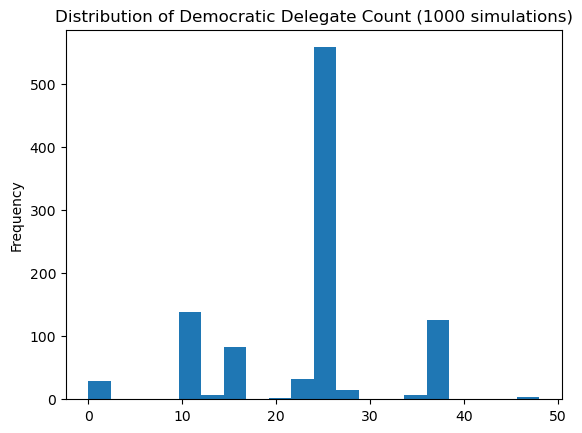

In [6]:
# Sample input 5 
# You may have to run this twice for the graph to show
df=pd.DataFrame([[10,2,8,1.5,15],\
                 [8, 1.5,6,1,10],\
                 [6, 1,  8,2,13],\
                 [5, 1,  8,1,10]],\
                index=['Region A','Region B','Region C','Region D'],\
                columns=['Dem-Mean','Dem-Std','Rep-Mean','Rep-Std','Delegates'])
dem,rep=election(df,1000)
import pandas as pd
import matplotlib.pyplot as plt
dem,rep=pd.Series(dem),pd.Series(rep)
print('Chance of a Democratic majority:',round((dem>rep).mean(),1))
dem.plot(kind='hist',bins=20,\
         title='Distribution of Democratic Delegate Count (1000 simulations)')
plt.show()

# Q2. Waiting Time Simulator (8 points)

This question asks you to create a tool to estimate the average time customers wait outside a store before being allowed to enter. The store has set a limit on the maximum number of customers that can be inside the store at any given time. Once this limit is reached, customers must queue outside the store until some customers exit, at which point the store will admit as many customers as possible while observing the maximum occupancy limit. You are to simulate the queueing dynamics and use a certain mathematical formula called Little's Law to estimate the average waiting time. 

**Write a function called `waiting_time` with three input arguments:**

- `arrivalsList`: a list of non-negative integers corresponding to the number of new customers lining up to enter the store in each minute. For simplicity, assume that all of the arriving customers show up exactly at the beginning of the minute. 
- `n`: the maximum occupancy limit. This is the maximum number of people allowed inside the store at any given time.
- `k`: the number of minutes each customer stays inside the store after being admitted. For simplicity, assume that every customer stays the same amount of time. If k=2, then every customer who is admitted is assumed to be inside the store for exactly 2 minutes before exiting.

**The function should return the average waiting time customers spend outside the store before being admitted, rounded to two decimal places.** For example, suppose that `arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]`, $n=15$ and $k=2$, the queuing dynamics can be described by the following table. Note that the number of people who exit is exactly the same as the number of people admitted $k$ minutes ago. Moreover, the occupancy changes from minute to minute based on the difference between the number of admits and the number of exits. On the other hand, the queue changes from minute to minute based on the difference between the number of arrivals and the number of admits. 

|Minute|Arrivals|Exit|Admitted|Occupancy|Queue|
|--|--|--|--|--|--|
|0|5|0|5|5|0|
|1|9|0|9|14|0|
|2|14|5|6|15|8|
|3|5|9|9|15|4|
|4|3|6|6|15|1|
|5|0|9|1|7|0|
|6|9|6|9|10|0|
|7|20|1|6|15|14|
|8|30|9|9|15|35|
|9|0|6|6|15|29|
|10|0|9|9|15|20|
|**Total**|**95**|` `|` `|` `|**111**|

$$\text{Av. Wait Time} = \frac{\text{Total Queue}}{\text{Total Arrivals}} \times \text{1 min} = \frac{111}{95}\times \text{1 min} \approx \text{1.17 minutes}$$

See the sample inputs and outputs for more examples.

In [7]:
# Final Solution
def waiting_time(arrivalsList,n,k):
    exit = []
    admitted = []
    queue = []
    occupancy = []
    for i in range(len(arrivalsList)):
        if i == 0:
            admitted.append(min(n,arrivalsList[i]))
            exit.append(0)
            occupancy.append(min(n,arrivalsList[i]))
            queue.append(arrivalsList[i]-n if n<arrivalsList[i] else 0)
        elif i<k:
            exit.append(0)
            admitted.append(min(queue[-1]+arrivalsList[i],n-occupancy[-1]+exit[i]))
            occupancy.append(sum(admitted[:-k-1:-1]))
            queue.append(queue[-1]+arrivalsList[i]-admitted[i])
        else:
            exit.append(admitted[-k])
            admitted.append(min(queue[-1]+arrivalsList[i],n-occupancy[-1]+exit[i]))
            occupancy.append(sum(admitted[:-k-1:-1]))
            queue.append(queue[-1]+arrivalsList[i]-admitted[i])
    return(round(sum(queue)/sum(arrivalsList),2))



In [8]:
# Sample run 1
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
waiting_time(arrivalsList,15,2)

1.17

In [9]:
# Sample run 2
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
print(f'Occupancy limit = 10\tWait time = {waiting_time(arrivalsList,10,3)} min.')

Occupancy limit = 10	Wait time = 3.23 min.


In [10]:
# Sample run 3
arrivalsList=[5,9,14,5,3,0,9,20,30,0,0]
print(f'Occupancy limit = 50\tWait time = {waiting_time(arrivalsList,50,3)} min.')

Occupancy limit = 50	Wait time = 0.09 min.


In [11]:
# Sample run 4
arrivalsList2=[0,0,5,10,20,30,40,35,30,20,20,20,15,15,15,10,20,20,30,30,20,20,10,5]
print('Dependence of average wait time on max occupancy: (assume k=3)')
print('n\tAv. Wait Time')
for n2 in range(10,61,10):
    print(f'{n2}\t{waiting_time(arrivalsList2,n2,3)}')

Dependence of average wait time on max occupancy: (assume k=3)
n	Av. Wait Time
10	10.06
20	8.23
30	6.48
40	4.81
50	3.22
60	1.62


In [12]:
# Sample run 5
arrivalsList2=[0,0,5,10,20,30,40,35,30,20,20,20,15,15,15,10,20,20,30,30,20,20,10,5]
print('Dependence of average wait time on shopping time: (assume n=40)')
print('k\tAv. Wait Time')
for shopping_time in range(1,11):
    print(f'{shopping_time}\t{waiting_time(arrivalsList2,40,shopping_time)}')

Dependence of average wait time on shopping time: (assume n=40)
k	Av. Wait Time
1	0.0
2	1.78
3	4.81
4	6.39
5	7.33
6	7.92
7	8.4
8	8.68
9	8.95
10	9.22


# Q3. Job Decision Simulator (9 points)

This question asks you to write Python code to simulate the responses of a given student to a series of job offers based on the timing of the offers and the student's personal preferences. Some job offers are acceptable to her and others are unacceptable, and among the acceptable offers, she may like some better than others. Every job offer has a deadline, and if she does not accept an offer by the deadline, then the offer expires. The student is very risk averse, meaning that she never lets an acceptable job offer expire without having another offer in hand that she likes at least as much. More precisely, assume that the student always responds to job offers based on the following rules:

- She turns down unacceptable offers immediately.
- She holds on to the first acceptable job offer that she receives. (Here, "holding on" to an offer does not necessarily mean that she will eventually accept the offer, but it means that she does not turn it down unless she gets another offer at least as good.) 
- At any time, she would hold on to at most one offer, which is her favorite acceptable offer received so far. If she receives a new acceptable offer while already holding on to an offer, she would compare the two and hold on to the offer she likes better, while turning down the other. If she likes the new offer equally as much as her favorite offer received so far, then she holds on to the one with the later deadline to respond, while turning down the one with the earlier deadline. If both of these favorite offers have the same deadline to respond, then she holds on to the one received earlier, while turning down the one received later.
- For the favorite offer that she is holding on to, if by the end of the last day to respond to this offer, the offer is still her favorite (i.e. she has not turned it down for something else), then she will accept this offer, at which point she is required to turn down all future offers since her acceptance of an offer cannot be reneged.


**Write a function called `job_decision` with two input arguments:**

- `offers`: a list in which each item corresponds to a job offer, and the order of the items corresponds to the order by which she receives the offers. Each job offer is represented by a list of three objects, `[offer_date,job_name,days_to_respond]`. The first object, `offer_date`, is an integer representing the day she receives the offer. The second object, `job_name`, is a string which serves as an unique identifier for the job. The third object, `days_to_respond`, is a positive integer indicating how many days she has to respond to the offer. For simplicity, assume that every offer is received on the morning of a day, and the deadline is always in the evening. example, if `offer_date=5` and `days_to_respond=3`, then she receives the offer on the morning of Day 5, and she must respond to the offer by the evening of Day 8 (because 5+3=8). You may assume that the offers are sorted so that those with earlier offer dates appear earlier in the list.
- `utility`: a dictionary in which the key is the unique identifier of a job (i.e. the same as `job_name` above), and the value is how much she likes the offer, with higher values corresponding to jobs she likes better. If two jobs have the same value, then she likes the two jobs equally. All of the entries in this dictionary are jobs she find acceptable, and if a job is not in the dictionary, then it means she does not find that job acceptable.

**The function should return a string denoting the unique identifier (i.e. `job_name`) of the offer she accepts.** If none of the offers are acceptable to her, then the function should return the empty string `''`. See the sample inputs and outputs below for examples.

In [13]:
# Final code
def job_decision(offers, utility):
    expiryLis = {}
    bestoffer = ""
    ind = 0
    for i in range(len(offers)):
        expiry = -1
        if(offers[i][1] in utility.keys()):
            expiry = offers[i][0] + offers[i][2]
            if( bestoffer == ""):
                bestoffer = offers[i][1]
                ind = i
        expiryLis[offers[i][1]] = expiry

    for i in range(ind+1, len(offers)):
        if( offers[i][1] in utility.keys()):
            if( offers[i][0] > expiryLis[bestoffer]):
                break
            else:
                if(utility[offers[i][1]] > utility[bestoffer]):
                    bestoffer = offers[i][1]
                elif(utility[offers[i][1]] == utility[bestoffer]):
                        if (expiryLis[offers[i][1]] > expiryLis[bestoffer] ):
                            bestoffer = offers[i][1]
    return(bestoffer)


In [14]:
# Sample input 1
# She first holds on to the Intel offer, then Amazon (better than Intel), then Google (later deadline than Amazon).
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[15,'Google',2],[15,'Facebook',2]]
utility={'Intel':5,'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers,utility)}.')

The student chose Google.


In [15]:
# Sample input 2
# She first holds on to the Intel offer, but nothing as good appears by Day 8, so she accepts Intel.
offers=[[5,'Intel',3],[9,'Amazon',7],[12,'Disney',3],[15,'Google',2],[15,'Facebook',2]]
utility={'Intel':5,'Amazon':9.5,'Google':10,'Facebook':10}
print(f'The student chose {job_decision(offers,utility)}.')

The student chose Intel.


In [16]:
# Sample input 3
# She first holds on to Amazon, then to Google, then to Facebook (each has later deadline than the previous.)
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[15,'Google',1],[15,'Facebook',2]]
utility2={'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers,utility2)}.')

The student chose Facebook.


In [17]:
# Sample input 4
# She first holds on to Amazon, and by Day 15, there's no offer that is as good with later deadline.
offers=[[5,'Intel',3],[8,'Amazon',7],[12,'Disney',3],[13,'Google',2],[16,'Facebook',2]]
utility2={'Amazon':8,'Google':8,'Facebook':8}
print(f'The student chose {job_decision(offers,utility2)}.')

The student chose Amazon.


In [18]:
# Sample input 5
# None of the offers are acceptable to her
offers3=[[8,'Amazon',7],[12,'Disney',3],[13,'Google',2],[17,'Facebook',2]]
utility3={'Apple':100, 'Intel': 80}
job_decision(offers3,utility3)

''